In [1230]:
import pandas as pd


data1 = pd.read_csv('../data/Turbine1.csv', sep=";")
data2 = pd.read_csv('../data/Turbine2.csv', sep=";")

## Observations

# 1. Hour is missing from 3 to 13 (not exaxt number).
# 2. Sometimes power value is very low --> have to look more into it.

In [1231]:
data1.columns

Index(['        Dat/Zeit', '  Wind', 'Rotor', 'Leistung', 'Azimut',
       '   Prod. 1', '   Prod. 2', 'BtrStd 1', 'BtrStd 2', 'Gen1-', 'Lager',
       'Außen', 'GetrT', ' Status', 'Spann', 'Spann.1', 'Spann.2', 'Strom-',
       'Strom-.1', 'Strom-.2', 'CosPh', '    Abgabe', '     Bezug',
       '  KH-Zähl1', '  KH-Zähl2', '  KH-DigiE', '  KH-DigiI', '  KH-Ana-1',
       '  KH-Ana-2', '  KH-Ana-3', '  KH-Ana-4'],
      dtype='object')

In [1232]:
data1.rename(columns=lambda x: x.strip(), inplace=True)

In [1233]:
data1.columns

Index(['Dat/Zeit', 'Wind', 'Rotor', 'Leistung', 'Azimut', 'Prod. 1', 'Prod. 2',
       'BtrStd 1', 'BtrStd 2', 'Gen1-', 'Lager', 'Außen', 'GetrT', 'Status',
       'Spann', 'Spann.1', 'Spann.2', 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'KH-Ana-4'],
      dtype='object')

In [1234]:
data1.shape

(13104, 31)

In [1235]:
data2.shape

(13104, 31)

In [1236]:
data2.columns

Index(['         Dat/Zeit', '  Wind', 'Rotor', 'Leistung', 'Azimut',
       '   Prod. 1', '   Prod. 2', 'BtrStd 1', 'BtrStd 2', 'Gen1-', 'Lager',
       'Außen', 'GetrT', ' Status', 'Spann', 'Spann.1', 'Spann.2', 'Strom-',
       'Strom-.1', 'Strom-.2', 'CosPh', '    Abgabe', '     Bezug',
       '  KH-Zähl1', '  KH-Zähl2', '  KH-DigiE', '  KH-DigiI', '  KH-Ana-1',
       '  KH-Ana-2', '  KH-Ana-3', '  KH-Ana-4'],
      dtype='object')

In [1237]:
print(min(data1.iloc[:,0]))

In [1238]:
print(max(data1.iloc[:,0]))

31.03.2016, 23:50


In [1239]:
print(min(data2.iloc[:,0]))

In [1240]:
print(max(data2.iloc[:,0]))

31.03.2016, 23:50


In [1241]:
data1.head()

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,Abgabe,Bezug,KH-Zähl1,KH-Zähl2,KH-DigiE,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
0,,m/s,rpm,kW,°,kWh,kWh,h,h,°C,...,kWh,kWh,Imp,Imp,Bit,Bit,,,,
1,"01.01.2016, 00:10","5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:20","5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:30","5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,0,0,0,0,0,0,0
4,"01.01.2016, 00:40","6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,0,0,0,0,0,0,0,"0,,,,"


In [1244]:
data1.iloc[:,[0,1,3]]

,Dat/Zeit,Wind,Leistung
0,,m/s,kW
1,01.01.2016 00:10,"5,8","268,5"
2,01.01.2016 00:20,"5,8","268,5"
3,01.01.2016 00:30,"5,8","272,1"
4,01.01.2016 00:40,"6,4","320,1"
...,...,...,...
13099,31.03.2016 23:10,"5,2","228,2"
13100,31.03.2016 23:20,"5,3","237,8"
13101,31.03.2016 23:30,"5,2","209,9"
13102,31.03.2016 23:40,"5,2","220,5"


In [1243]:
data1["Dat/Zeit"] = data1["Dat/Zeit"].replace(',', '', regex=True)

In [1248]:
data1["time"] = pd.to_datetime(data1["Dat/Zeit"], dayfirst=True, errors="coerce")
data1["date"]= data1["time"].dt.date
data1["hour"] = data1["time"].dt.hour
data1["weekday"] = data1["time"].dt.weekday
data1["min"] = data1["time"].dt.minute
data1["day"] = data1["time"].dt.day

In [1252]:
data1["month"] = data1["time"].dt.month

In [1253]:
data1

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
0,,m/s,rpm,kW,°,kWh,kWh,h,h,°C,...,,,,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,01.01.2016 00:10,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0,1.0
2,01.01.2016 00:20,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0,1.0
3,01.01.2016 00:30,"5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0,1.0
4,01.01.2016 00:40,"6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,"0,,,,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,31.03.2016 23:10,"5,2",10,"228,2","359,1",32300592,5866558,49430,46892,"16,2",...,0,0,"0,,,,,,",2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0,31.0,3.0
13100,31.03.2016 23:20,"5,3",10,"237,8","359,7",32300592,5866593,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0,31.0,3.0
13101,31.03.2016 23:30,"5,2",10,"209,9","0,3",32300592,5866632,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0,31.0,3.0
13102,31.03.2016 23:40,"5,2",10,"220,5",0,32300592,5866670,49430,46892,17,...,0,0,"0,,,,,",2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0,31.0,3.0


In [1151]:
data1["min"] = data1["time"].dt.minute

In [1152]:
data1

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min
0,,m/s,rpm,kW,°,kWh,kWh,h,h,°C,...,Bit,,,,,NaT,NaT,NaN,NaN,NaN
1,"01.01.2016, 00:10","5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0
2,"01.01.2016, 00:20","5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0
3,"01.01.2016, 00:30","5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0
4,"01.01.2016, 00:40","6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,0,0,"0,,,,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,"31.03.2016, 23:10","5,2",10,"228,2","359,1",32300592,5866558,49430,46892,"16,2",...,0,0,0,0,"0,,,,,,",2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0
13100,"31.03.2016, 23:20","5,3",10,"237,8","359,7",32300592,5866593,49430,46892,17,...,0,0,0,0,"0,,,,",2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0
13101,"31.03.2016, 23:30","5,2",10,"209,9","0,3",32300592,5866632,49430,46892,17,...,0,0,0,0,"0,,,,",2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0
13102,"31.03.2016, 23:40","5,2",10,"220,5",0,32300592,5866670,49430,46892,17,...,0,0,0,0,"0,,,,,",2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0


In [1264]:
print(min(data1.loc[1:,"date"]))
print(max(data1.loc[1:, "date"]))

2016-01-01
2016-03-31


In [1265]:
data_new = data1.loc[1:, :]

In [1266]:
data_new.head()

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
1,01.01.2016 00:10,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0,1.0
2,01.01.2016 00:20,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0,1.0
3,01.01.2016 00:30,"5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0,1.0
4,01.01.2016 00:40,"6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,"0,,,,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0,1.0
5,01.01.2016 00:50,"6,9","14,5","457,4","161,1",31533206,5743049,48371,46008,20,...,0,0,"0,",2016-01-01 00:50:00,2016-01-01,0.0,4.0,50.0,1.0,1.0


In [1267]:
data_new.sort_values(by=['time'], inplace=True)

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_4716\344509492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.sort_values(by=['time'], inplace=True)


In [1268]:
data_new

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
1,01.01.2016 00:10,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0,1.0
2,01.01.2016 00:20,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0,1.0
3,01.01.2016 00:30,"5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0,1.0
4,01.01.2016 00:40,"6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,"0,,,,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0,1.0
5,01.01.2016 00:50,"6,9","14,5","457,4","161,1",31533206,5743049,48371,46008,20,...,0,0,"0,",2016-01-01 00:50:00,2016-01-01,0.0,4.0,50.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,31.03.2016 23:10,"5,2",10,"228,2","359,1",32300592,5866558,49430,46892,"16,2",...,0,0,"0,,,,,,",2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0,31.0,3.0
13100,31.03.2016 23:20,"5,3",10,"237,8","359,7",32300592,5866593,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0,31.0,3.0
13101,31.03.2016 23:30,"5,2",10,"209,9","0,3",32300592,5866632,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0,31.0,3.0
13102,31.03.2016 23:40,"5,2",10,"220,5",0,32300592,5866670,49430,46892,17,...,0,0,"0,,,,,",2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0,31.0,3.0


In [1269]:
data_new

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
1,01.01.2016 00:10,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0,1.0
2,01.01.2016 00:20,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0,1.0
3,01.01.2016 00:30,"5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0,1.0
4,01.01.2016 00:40,"6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,"0,,,,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0,1.0
5,01.01.2016 00:50,"6,9","14,5","457,4","161,1",31533206,5743049,48371,46008,20,...,0,0,"0,",2016-01-01 00:50:00,2016-01-01,0.0,4.0,50.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,31.03.2016 23:10,"5,2",10,"228,2","359,1",32300592,5866558,49430,46892,"16,2",...,0,0,"0,,,,,,",2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0,31.0,3.0
13100,31.03.2016 23:20,"5,3",10,"237,8","359,7",32300592,5866593,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0,31.0,3.0
13101,31.03.2016 23:30,"5,2",10,"209,9","0,3",32300592,5866632,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0,31.0,3.0
13102,31.03.2016 23:40,"5,2",10,"220,5",0,32300592,5866670,49430,46892,17,...,0,0,"0,,,,,",2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0,31.0,3.0


In [1270]:
data_new["day"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.])

In [1271]:
data_new = data_new.replace(',', '.', regex=True)

In [1272]:
data_new[["Wind", "Leistung"]] = data_new[["Wind", "Leistung"]].apply(pd.to_numeric)

In [1273]:
data_new.dtypes

Dat/Zeit            object
Wind               float64
Rotor               object
Leistung           float64
Azimut              object
Prod. 1             object
Prod. 2             object
BtrStd 1            object
BtrStd 2            object
Gen1-               object
Lager               object
Außen               object
GetrT               object
Status              object
Spann               object
Spann.1             object
Spann.2             object
Strom-              object
Strom-.1            object
Strom-.2            object
CosPh               object
Abgabe              object
Bezug               object
KH-Zähl1            object
KH-Zähl2            object
KH-DigiE            object
KH-DigiI            object
KH-Ana-1            object
KH-Ana-2            object
KH-Ana-3            object
KH-Ana-4            object
time        datetime64[ns]
date                object
hour               float64
weekday            float64
min                float64
day                float64
m

In [1274]:
data_new

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
1,01.01.2016 00:10,5.8,10,268.5,161.4,31533151,5742941,48371,46008,14.8,...,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0,1.0
2,01.01.2016 00:20,5.8,10,268.5,161.4,31533151,5742941,48371,46008,14.8,...,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0,1.0
3,01.01.2016 00:30,5.8,10,272.1,160.6,31533151,5742983,48371,46008,15.9,...,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0,1.0
4,01.01.2016 00:40,6.4,10,320.1,162,31533151,5743039,48371,46008,17.7,...,0,0,0....,2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0,1.0
5,01.01.2016 00:50,6.9,14.5,457.4,161.1,31533206,5743049,48371,46008,20,...,0,0,0.,2016-01-01 00:50:00,2016-01-01,0.0,4.0,50.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,31.03.2016 23:10,5.2,10,228.2,359.1,32300592,5866558,49430,46892,16.2,...,0,0,0......,2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0,31.0,3.0
13100,31.03.2016 23:20,5.3,10,237.8,359.7,32300592,5866593,49430,46892,17,...,0,0,0....,2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0,31.0,3.0
13101,31.03.2016 23:30,5.2,10,209.9,0.3,32300592,5866632,49430,46892,17,...,0,0,0....,2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0,31.0,3.0
13102,31.03.2016 23:40,5.2,10,220.5,0,32300592,5866670,49430,46892,17,...,0,0,0.....,2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0,31.0,3.0


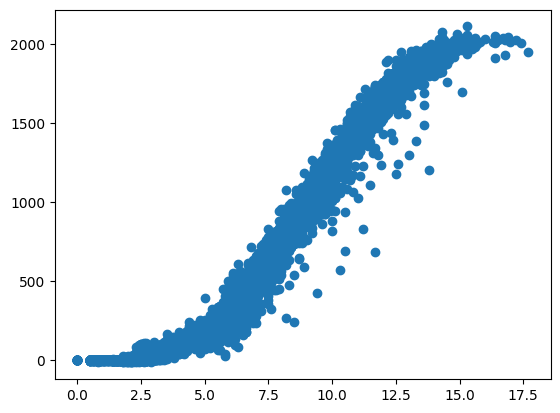

In [1275]:
import matplotlib.pyplot as plt

plt.scatter(data_new["Wind"], data_new["Leistung"])
plt.show()

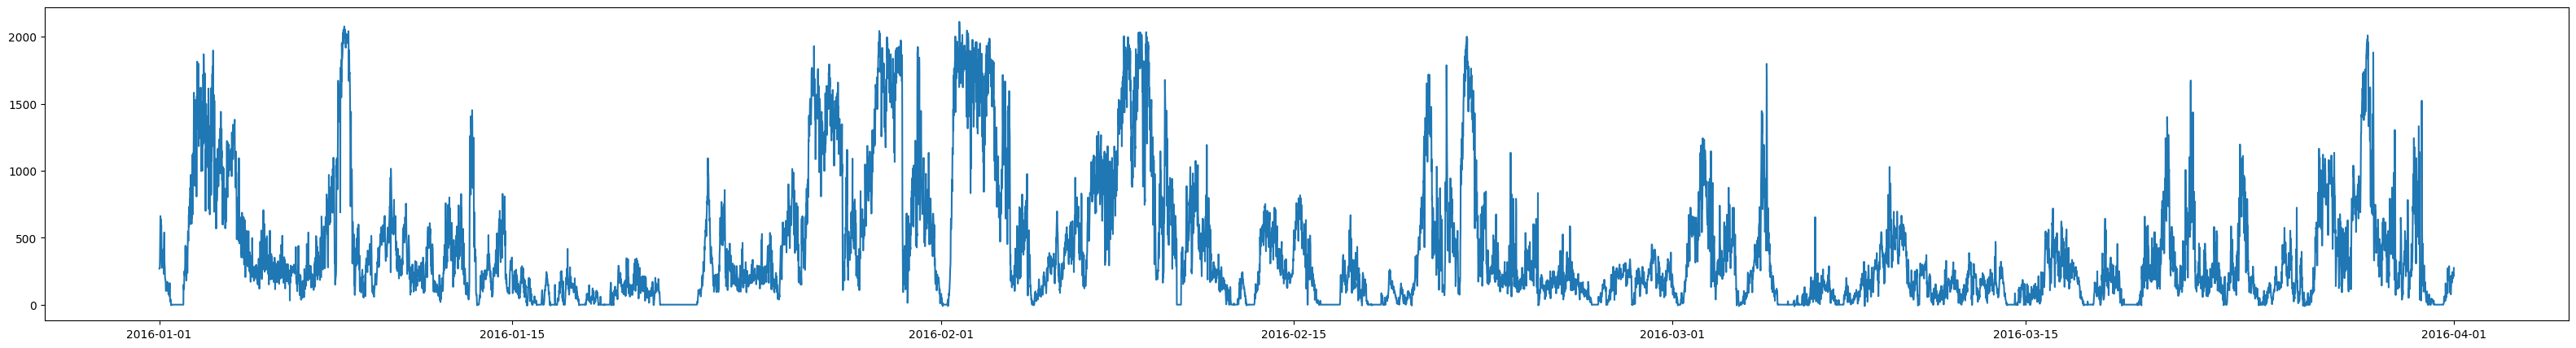

In [1276]:
plt.figure(figsize=(40,5))
plt.plot(data_new["time"], data_new["Leistung"])
plt.show()

In [1277]:
## Total no. of orders by hours and how many items orders were ordered
power_mean_hourly = data_new.groupby("hour").mean()["Leistung"]
# item_count_hourly = data1.groupby("hour").sum()["ITEM_COUNT"]

power_mean_hourly

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_4716\2584181427.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  power_mean_hourly = data_new.groupby("hour").mean()["Leistung"]


hour
0.0     386.157615
1.0     421.224908
2.0     414.390110
3.0     423.156044
4.0     401.419048
5.0     424.463919
6.0     419.179670
7.0     404.010989
8.0     416.009341
9.0     417.194505
10.0    418.100733
11.0    412.345238
12.0    415.767766
13.0    414.711538
14.0    404.630403
15.0    412.906960
16.0    384.504396
17.0    388.227106
18.0    385.241575
19.0    401.209158
20.0    406.169048
21.0    422.511905
22.0    405.760623
23.0    386.871062
Name: Leistung, dtype: float64

In [1278]:
data_new.hour.dropna().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
24


Text(0.5, 1.0, 'Average Power each hour')

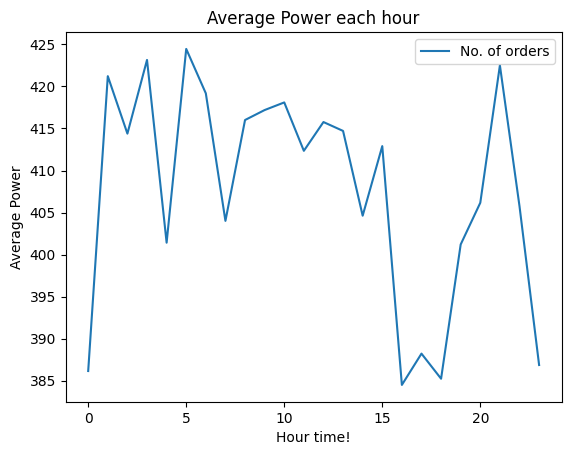

In [1279]:
hour_idx = [i for i, _ in enumerate(data_new.hour.dropna().unique())]

print(hour_idx)
print(len(power_mean_hourly))

plt.plot(hour_idx, power_mean_hourly)
# plt.plot(hour_idx, item_count_hourly)
plt.legend(["No. of orders", "Item count"])
## order from 4th hour of day starts and end at 22nd, thats why from 4 to 22.
# plt.xticks(hour_idx, ["4","5", "6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22"])
plt.xlabel("Hour time!")
plt.ylabel("Average Power")
plt.title("Average Power each hour")

In [1300]:
data_new["weekday"].value_counts()

5.0    1872
6.0    1872
0.0    1872
1.0    1872
2.0    1872
3.0    1872
4.0    1871
Name: weekday, dtype: int64

In [1280]:
power_mean_weekday = data_new.groupby("weekday").mean()["Leistung"]
# item_count_hourly = data1.groupby("hour").sum()["ITEM_COUNT"]

power_mean_weekday

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_4716\4192199485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  power_mean_weekday = data_new.groupby("weekday").mean()["Leistung"]


weekday
0.0    502.688301
1.0    436.165491
2.0    461.918803
3.0    238.781357
4.0    356.966916
5.0    394.424786
6.0    463.336485
Name: Leistung, dtype: float64

[0, 1, 2, 3, 4, 5, 6]
7


Text(0.5, 1.0, 'Average Power each weekday')

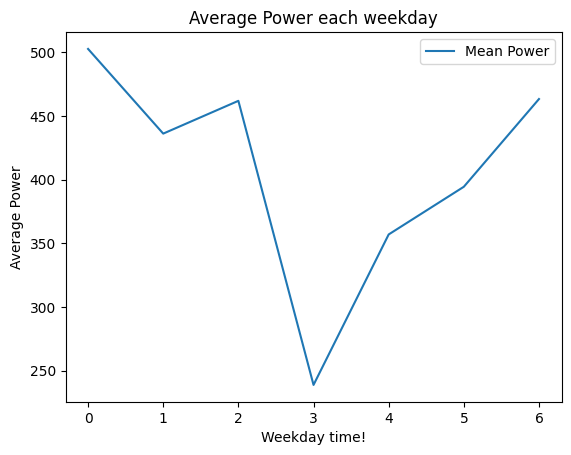

In [1282]:
week_idx = [i for i, _ in enumerate(data_new.weekday.dropna().unique())]

print(week_idx)
print(len(power_mean_weekday))

plt.plot(week_idx, power_mean_weekday)
# plt.plot(hour_idx, item_count_hourly)
plt.legend(["Mean Power"])
## order from 4th hour of day starts and end at 22nd, thats why from 4 to 22.
# plt.xticks(hour_idx, ["4","5", "6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22"])
plt.xlabel("Weekday time!")
plt.ylabel("Average Power")
plt.title("Average Power each weekday")

In [1185]:
data_new.Bezug.value_counts()

71    7069
0     6034
Name: Bezug, dtype: int64

In [1186]:
data_new[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'Strom-', "Leistung"]] = data_new[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'Strom-', "Leistung"]].apply(pd.to_numeric)

In [1196]:
data_new["BtrStd 1"].value_counts()

48599    381
48596    340
49041    336
48595    311
49206    305
        ... 
48853      5
48976      5
49154      5
49241      5
48575      4
Name: BtrStd 1, Length: 1059, dtype: int64

In [1297]:
data_new["BtrStd 2"].value_counts()

46013    459
46297    402
46270    348
46258    340
46863    256
        ... 
46094      5
46089      5
46465      5
46469      5
46892      5
Name: BtrStd 2, Length: 885, dtype: int64

In [1193]:
data_new["Rotor"].value_counts()

16.0    5989
10.0    4900
0.0      648
9.8       71
9.9       42
        ... 
3.2        1
14.7       1
1.1        1
1.4        1
1.9        1
Name: Rotor, Length: 155, dtype: int64

In [1194]:
data_new["Azimut"].value_counts()

353.7    69
142.5    63
0.0      45
227.5    39
265.6    32
         ..
307.3     1
299.6     1
299.2     1
108.2     1
56.5      1
Name: Azimut, Length: 3211, dtype: int64

In [1305]:
data_new["Lager"].value_counts()

66      323
71      253
67      239
52      217
49      185
       ... 
23.1      1
21.3      1
37.7      1
20.3      1
30.2      1
Name: Lager, Length: 468, dtype: int64

In [1200]:
data_new["GetrT"].value_counts()

45.0    841
44.0    611
48.0    510
46.0    508
47.0    505
       ... 
17.4      1
16.2      1
14.5      1
13.3      1
51.5      1
Name: GetrT, Length: 324, dtype: int64

In [1201]:
data_new["Abgabe"].value_counts()

0       6034
1591    3285
1595    2042
1590    1740
1593       2
Name: Abgabe, dtype: int64

In [1283]:
data_new["Leistung"].mean()

407.7584675265206

In [1285]:
data_new["Leistung"].min()

-12.6

In [1286]:
data_new["Leistung"].max()

2111.2

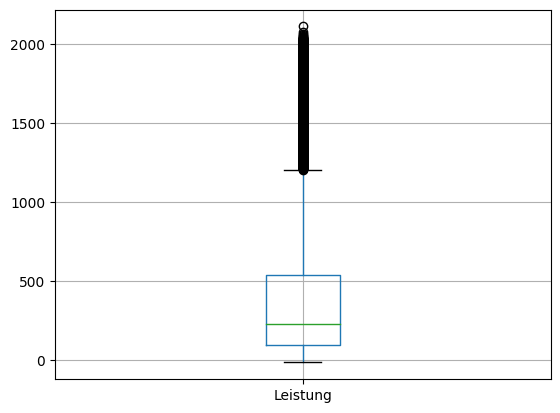

In [1284]:
boxplot = data_new.boxplot(column=["Leistung"])

In [1294]:
import numpy as np
leistung_arr = data_new["Leistung"].to_numpy()
mean = np.mean(leistung_arr)
std = np.std(leistung_arr)
threshold = 3 
outliers = np.where(np.abs(leistung_arr - mean) > threshold * std)
print(outliers[0])
print(len(outliers[0]))

[  216   222   253   307  1038  1042  1043  1044  1045  1046  1047  1048
  1049  1050  1051  1052  1053  1054  1055  1056  1057  1058  1059  1060
  1061  1062  1063  1064  1065  1066  1067  1068  1069  1070  1071  1072
  1073  1074  1075  1076  1077  1078  1079  1080  1081  1084  3738  3825
  4105  4106  4107  4108  4109  4110  4111  4112  4113  4114  4115  4116
  4120  4121  4122  4128  4131  4137  4154  4155  4156  4157  4158  4159
  4160  4165  4166  4170  4171  4172  4173  4176  4177  4189  4203  4204
  4207  4210  4211  4214  4215  4216  4217  4218  4220  4221  4222  4223
  4224  4228  4230  4232  4233  4234  4235  4236  4237  4238  4241  4329
  4330  4331  4339  4543  4545  4549  4552  4553  4554  4555  4557  4558
  4559  4560  4563  4564  4568  4569  4570  4571  4572  4573  4574  4575
  4579  4580  4581  4582  4583  4584  4585  4586  4587  4593  4594  4595
  4596  4597  4598  4599  4600  4602  4603  4604  4605  4607  4610  4611
  4612  4613  4614  4615  4618  4619  4620  4624  4

In [1292]:
data_higher_leistung = data_new.loc[outliers[0], :]

In [1301]:
data_higher_leistung["weekday"].value_counts()

0.0    103
1.0     76
4.0     74
5.0     31
6.0     18
2.0      3
Name: weekday, dtype: int64

In [1296]:
data_higher_leistung["BtrStd 2"].value_counts()

46270    104
46297     63
46258     59
46050     42
46397     13
46863     13
46013      4
46260      4
46256      2
46554      1
Name: BtrStd 2, dtype: int64

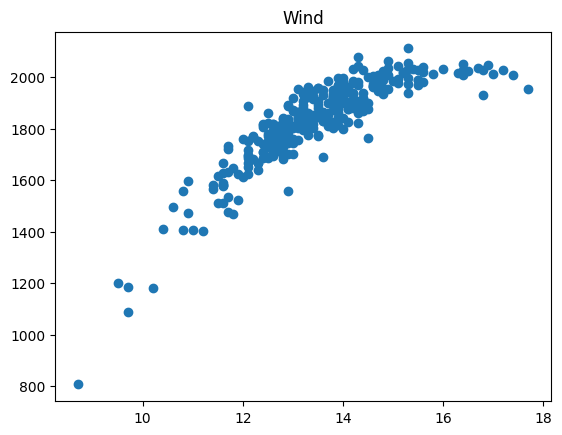

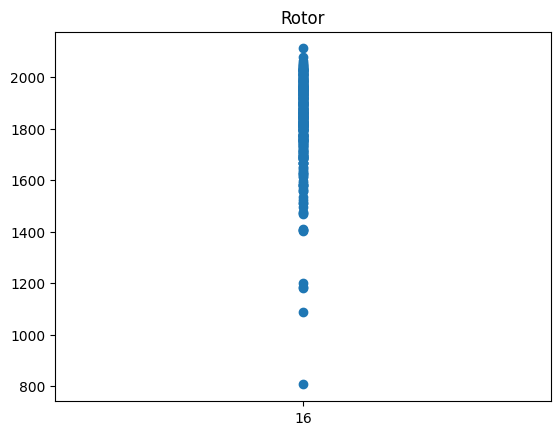

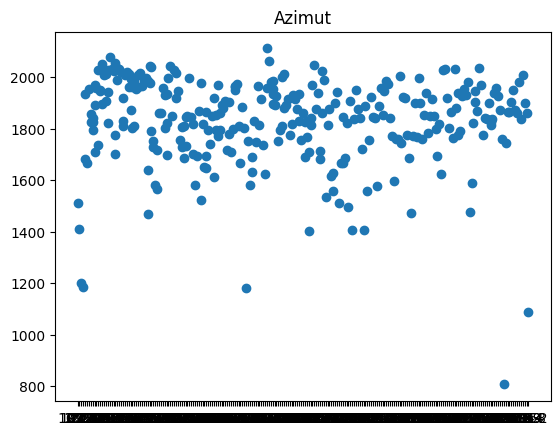

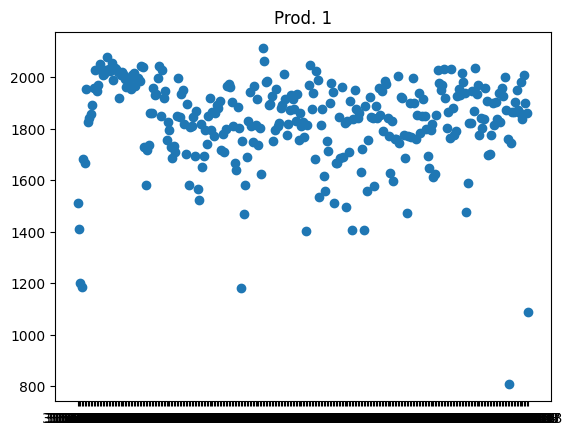

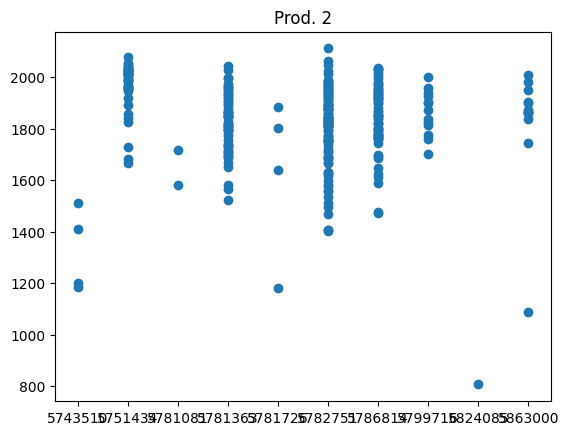

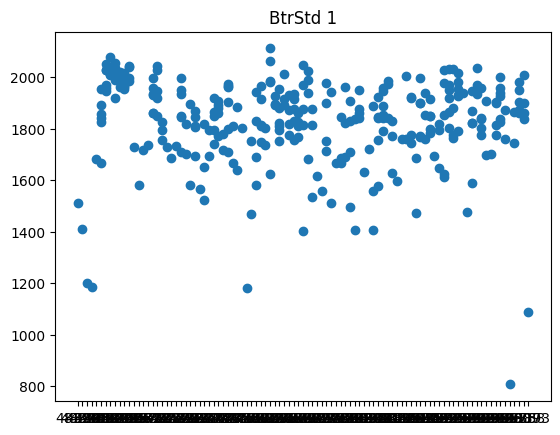

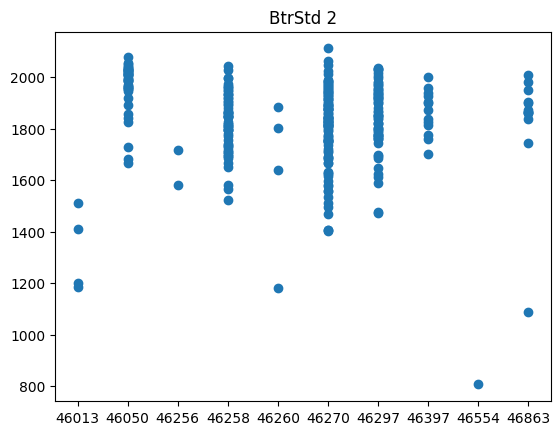

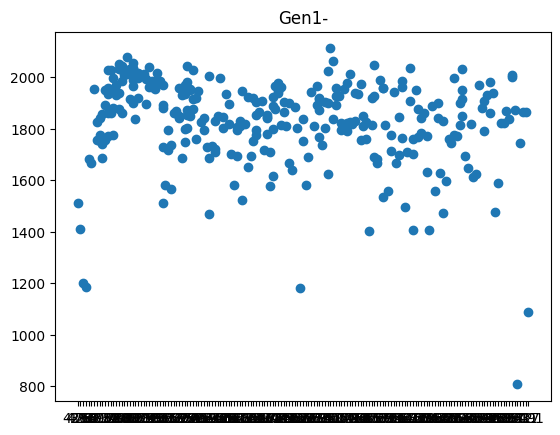

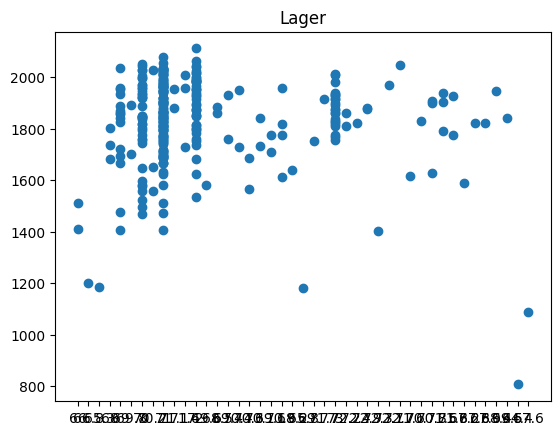

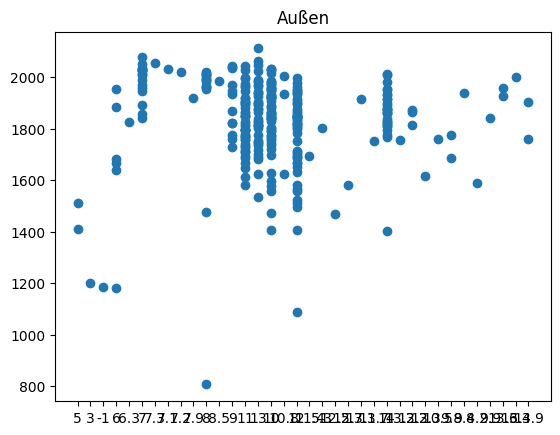

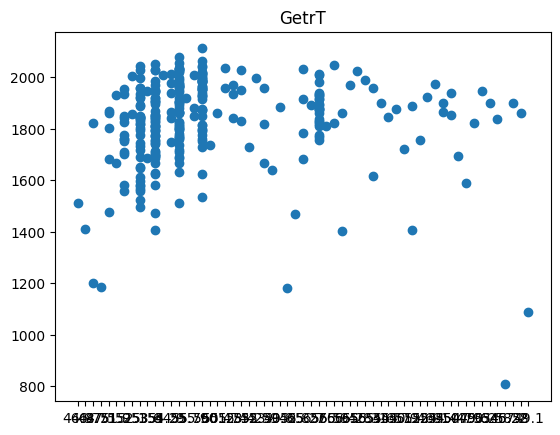

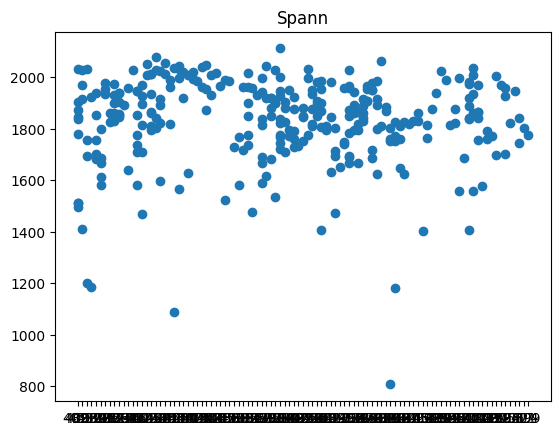

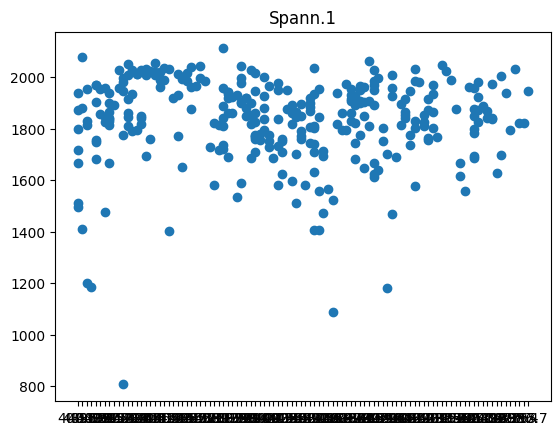

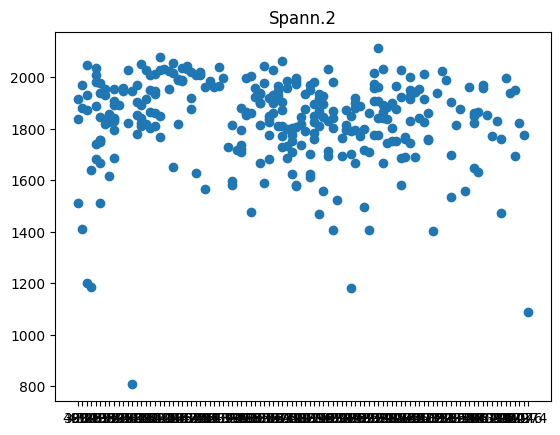

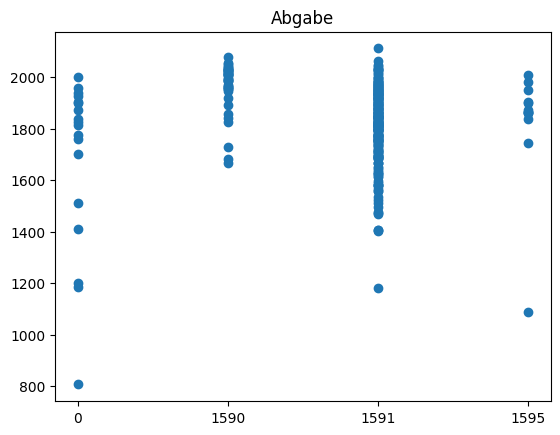

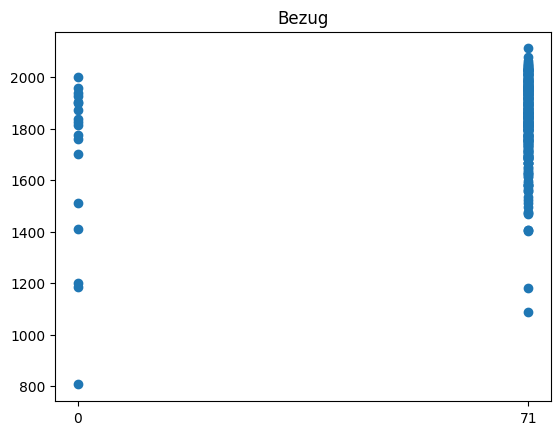

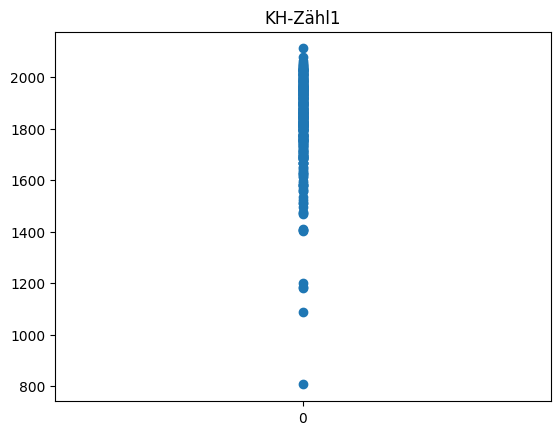

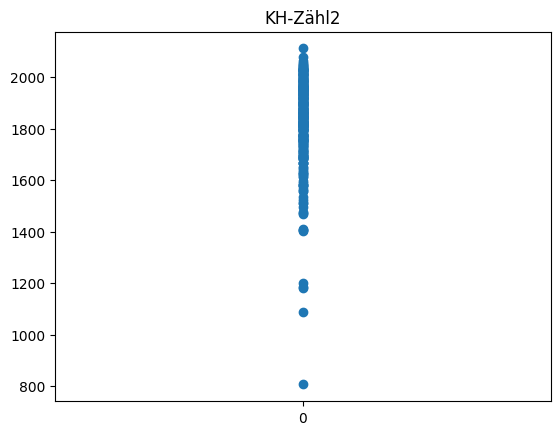

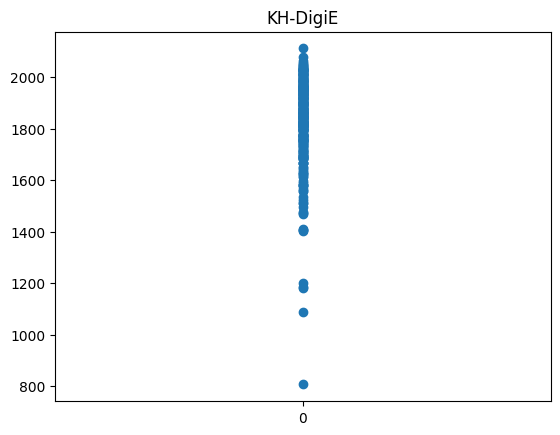

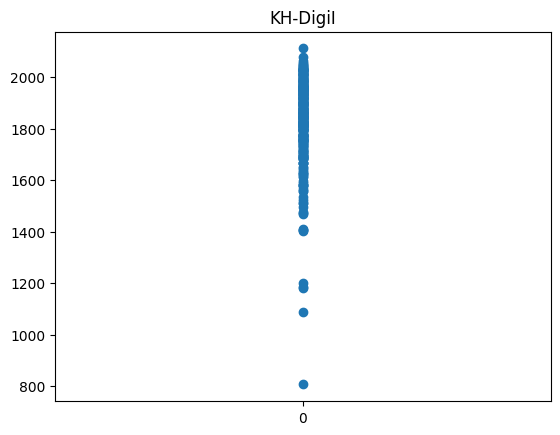

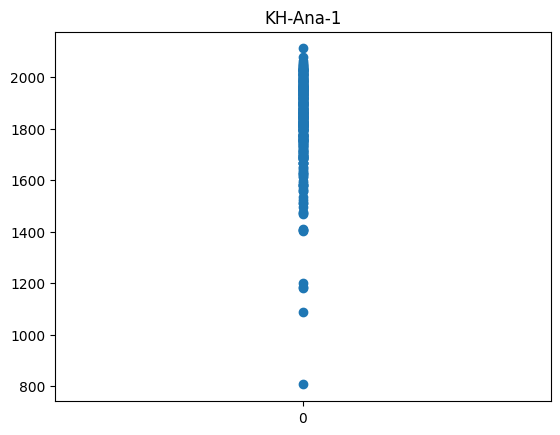

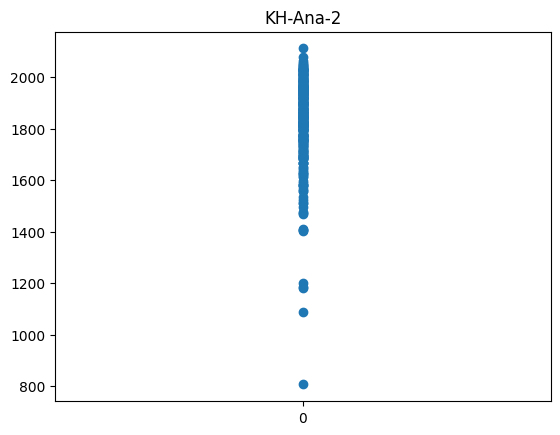

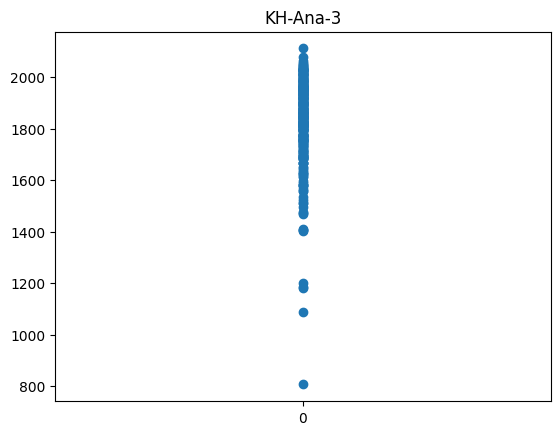

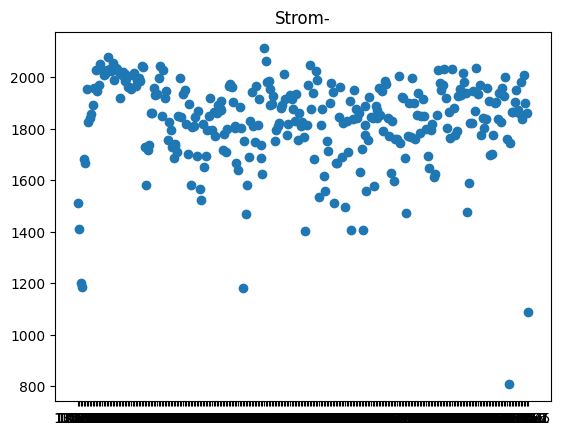

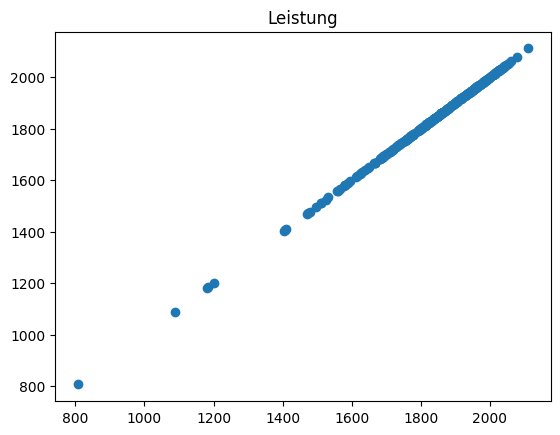

In [1295]:
import matplotlib.pyplot as plt

for col in ["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE', 'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'Strom-', "Leistung"]:
       plt.scatter(data_higher_leistung[col], data_higher_leistung["Leistung"])
       plt.title(col)
       plt.show()

In [1293]:
data_higher_leistung

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
216,02.01.2016 12:00,11.5,16,1511.7,107.4,31544487,5743510,48390,46013,42.9,...,0,0,0....,2016-01-02 12:00:00,2016-01-02,12.0,5.0,0.0,2.0,1.0
222,02.01.2016 13:00,10.4,16,1408.4,102.5,31546054,5743510,48391,46013,47.1,...,0,0,0...,2016-01-02 13:00:00,2016-01-02,13.0,5.0,0.0,2.0,1.0
253,02.01.2016 18:10,9.5,16,1201.9,99.8,31553155,5743510,48396,46013,42.4,...,0,0,0..,2016-01-02 18:10:00,2016-01-02,18.0,5.0,10.0,2.0,1.0
307,03.01.2016 03:10,9.7,16,1185.1,102.4,31564257,5743510,48405,46013,39.1,...,0,0,0.,2016-01-03 03:10:00,2016-01-03,3.0,6.0,10.0,3.0,1.0
1038,08.01.2016 05:00,12.2,16,1680.4,221.2,31618327,5751434,48489,46050,58,...,0,0,0.....,2016-01-08 05:00:00,2016-01-08,5.0,4.0,0.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,28.03.2016 13:40,13.4,16,1837.5,158.3,32273824,5863000,49388,46863,80.1,...,0,0,0.....,2016-03-28 13:40:00,2016-03-28,13.0,0.0,40.0,28.0,3.0
12611,28.03.2016 13:50,14.7,16,2009.7,157.9,32274128,5863000,49388,46863,81.4,...,0,0,0....,2016-03-28 13:50:00,2016-03-28,13.0,0.0,50.0,28.0,3.0
12612,28.03.2016 14:00,13.9,16,1899.7,165.4,32274458,5863000,49388,46863,81,...,0,0,0....,2016-03-28 14:00:00,2016-03-28,14.0,0.0,0.0,28.0,3.0
12613,28.03.2016 14:10,13.7,16,1858.8,168.8,32274747,5863000,49388,46863,79.8,...,0,0,0.....,2016-03-28 14:10:00,2016-03-28,14.0,0.0,10.0,28.0,3.0


In [1304]:
data_higher_leistung["Lager"].value_counts()

71      121
72       43
70       40
73       23
69       15
70.9      4
70.8      3
68        3
71.5      3
70.2      3
71.4      3
72.2      2
66        2
71.8      2
72.9      2
70.1      2
69.1      2
70.4      2
70.3      2
69.4      2
68.5      2
71.1      2
69.8      2
71.6      1
68.4      1
67.9      1
67.8      1
67.2      1
69.5      1
64.4      1
70.7      1
65.8      1
72.7      1
72.1      1
72.3      1
72.4      1
71.7      1
69.7      1
66.8      1
68.2      1
69.6      1
65.3      1
67.6      1
Name: Lager, dtype: int64

In [1189]:
data_leistung_negative = data_new[data_new["Leistung"]<0]

In [1190]:
data_leistung_negative

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day
68,01.01.2016. 11:20,2.1,10.0,-4.4,216.9,31535229,5743510,48377,46013,10.0,...,0,0,0,0.....,2016-01-01 11:20:00,2016-01-01,11.0,4.0,20.0,1
79,01.01.2016. 13:10,1.5,0.0,-0.1,247.5,31535229,5743510,48377,46013,10.0,...,0,0,0,0......,2016-01-01 13:10:00,2016-01-01,13.0,4.0,10.0,1
118,01.01.2016. 19:40,0.5,0.0,-0.1,186.3,31535231,5743510,48377,46013,14.0,...,0,0,0,0...,2016-01-01 19:40:00,2016-01-01,19.0,4.0,40.0,1
125,01.01.2016. 20:50,0.5,0.0,-0.1,179.8,31535231,5743510,48377,46013,15.0,...,0,0,0,0....,2016-01-01 20:50:00,2016-01-01,20.0,4.0,50.0,1
136,01.01.2016. 22:40,1.2,0.0,-0.1,174.9,31535231,5743510,48377,46013,15.0,...,0,0,0,0....,2016-01-01 22:40:00,2016-01-01,22.0,4.0,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,12.02.2016. 14:10,1.4,5.9,-0.1,135.8,32052515,5790256,48991,46316,5.9,...,0,0,0,0.....,2016-12-02 14:10:00,2016-12-02,14.0,4.0,10.0,2
6138,12.02.2016. 15:00,1.7,9.8,-2.4,150.1,32052515,5790257,48991,46317,6.9,...,0,0,0,0...,2016-12-02 15:00:00,2016-12-02,15.0,4.0,0.0,2
6139,12.02.2016. 15:10,1.6,7.1,-0.2,150.7,32052515,5790257,48991,46317,6.4,...,0,0,0,0..,2016-12-02 15:10:00,2016-12-02,15.0,4.0,10.0,2
10292,12.03.2016. 11:20,2.5,9.7,-0.3,77.9,32191613,5837448,49239,46671,8.0,...,0,0,0,0....,2016-12-03 11:20:00,2016-12-03,11.0,5.0,20.0,3


In [1191]:
data_leistung_negative[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'Strom-', "Leistung"]] = data_leistung_negative[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'Strom-', "Leistung"]].apply(pd.to_numeric)

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_4716\3472653160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_leistung_negative[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',


In [1195]:
data_leistung_negative["BtrStd 1"].value_counts()

49205    24
48595    19
49041    18
49243    15
49032    15
49270    14
48596    13
48991    12
48599    11
49265    10
49341     9
49136     7
49430     7
48776     6
49330     6
48846     5
49206     5
48377     5
49188     4
49129     4
49145     3
49239     3
49316     2
49137     2
48580     2
49238     2
49242     1
Name: BtrStd 1, dtype: int64

In [1198]:
data_leistung_negative["Lager"].value_counts()

49.0    19
48.0    14
47.0     9
46.0     7
50.0     6
        ..
28.2     1
46.3     1
50.8     1
44.7     1
48.9     1
Name: Lager, Length: 102, dtype: int64

In [1199]:
data_leistung_negative["Rotor"].value_counts()

0.0     50
10.0    37
9.8     25
9.5      8
9.2      7
10.1     6
9.6      5
9.7      5
9.4      5
9.9      4
8.8      4
6.2      3
6.1      3
5.7      3
7.4      2
3.4      2
8.4      2
10.2     2
5.6      2
8.0      2
3.1      2
6.7      2
10.3     2
7.1      2
8.6      2
8.1      2
8.2      2
9.0      1
4.9      1
2.3      1
4.6      1
8.9      1
5.1      1
6.6      1
4.5      1
4.1      1
10.5     1
11.0     1
10.9     1
4.0      1
9.1      1
5.5      1
5.8      1
9.3      1
8.7      1
8.5      1
3.0      1
6.0      1
6.4      1
4.4      1
7.0      1
4.8      1
7.2      1
10.4     1
7.5      1
1.4      1
6.9      1
3.6      1
0.3      1
5.9      1
Name: Rotor, dtype: int64

In [1202]:
data_leistung_negative["Abgabe"].value_counts()

0       128
1595     40
1591     30
1590     26
Name: Abgabe, dtype: int64

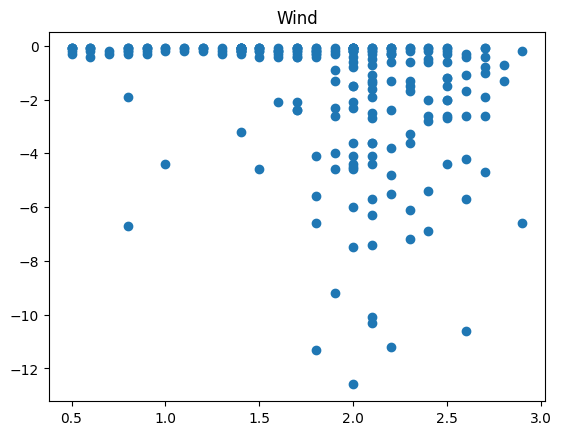

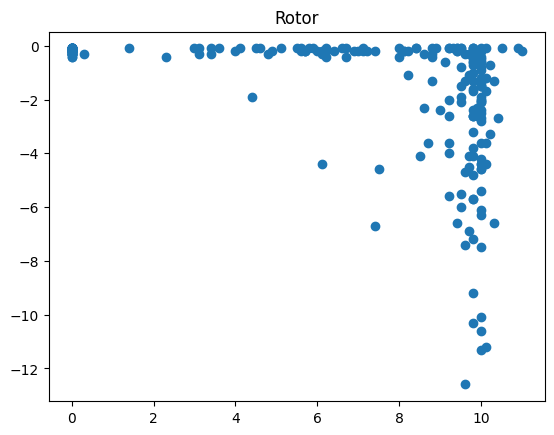

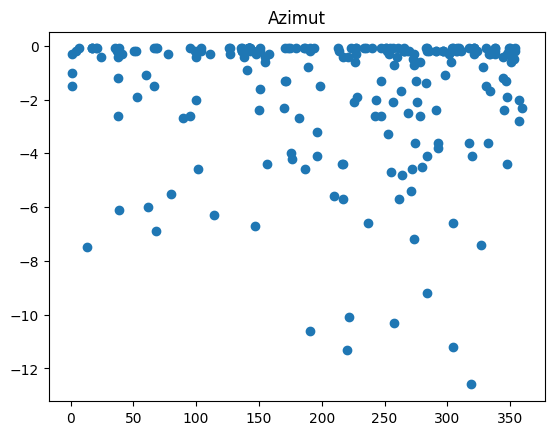

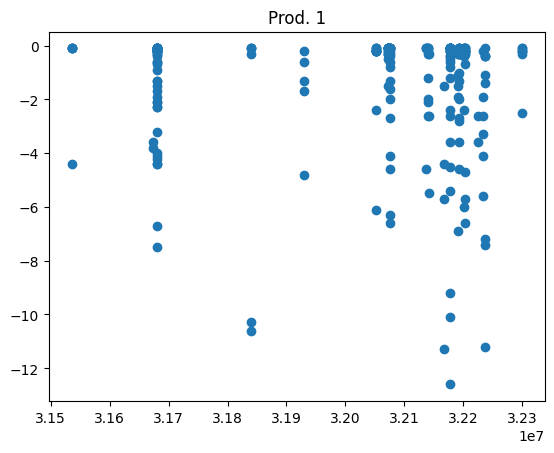

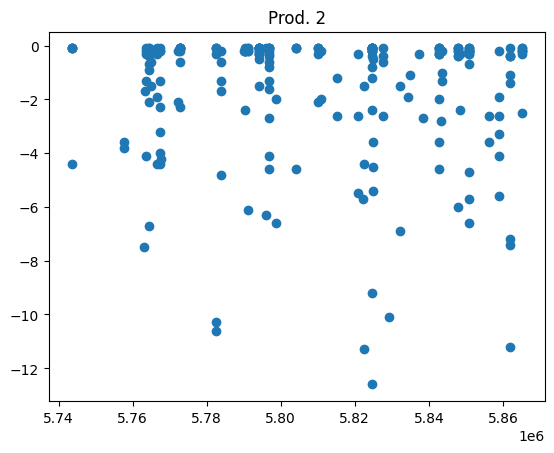

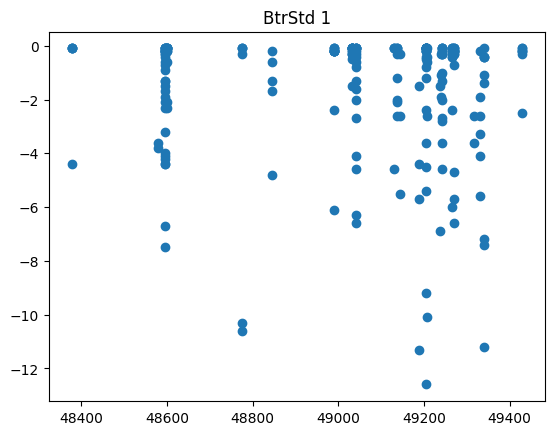

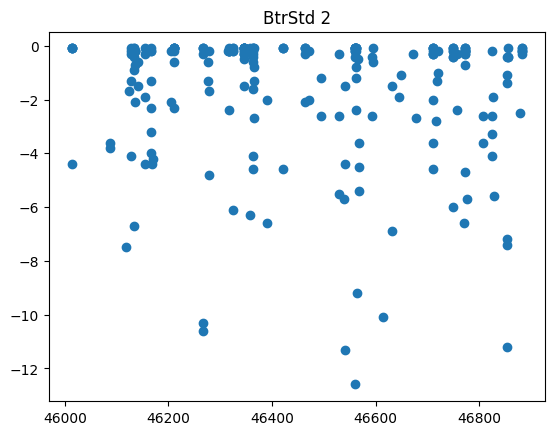

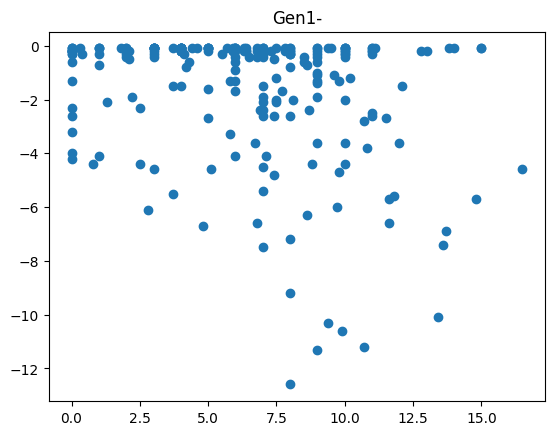

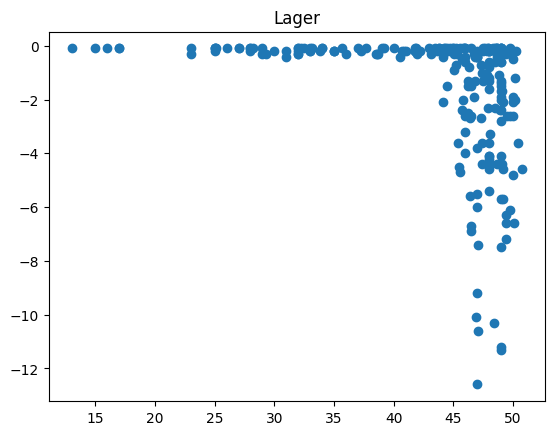

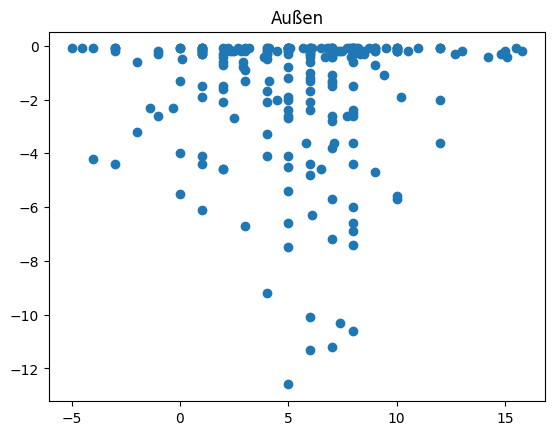

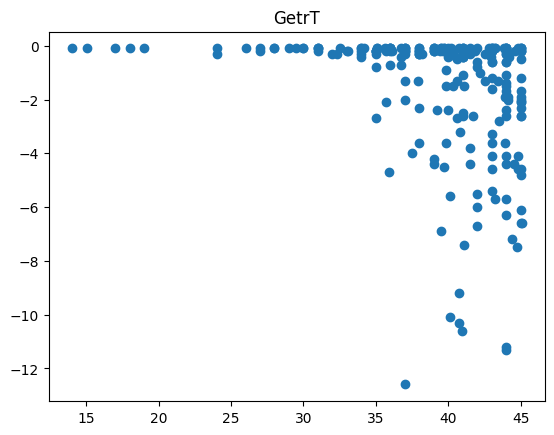

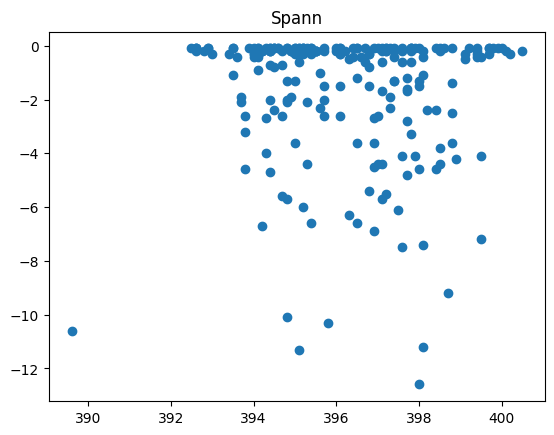

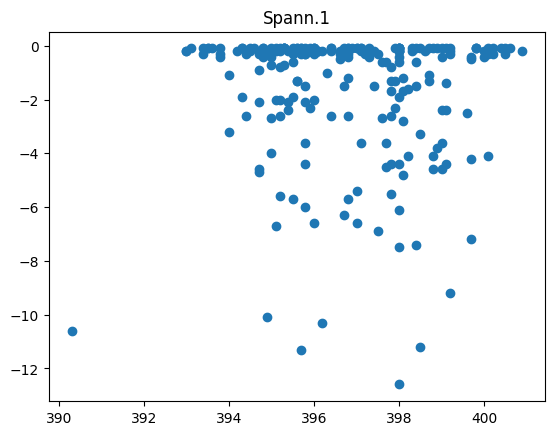

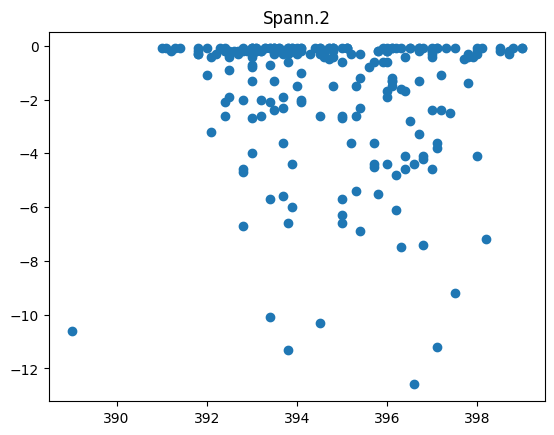

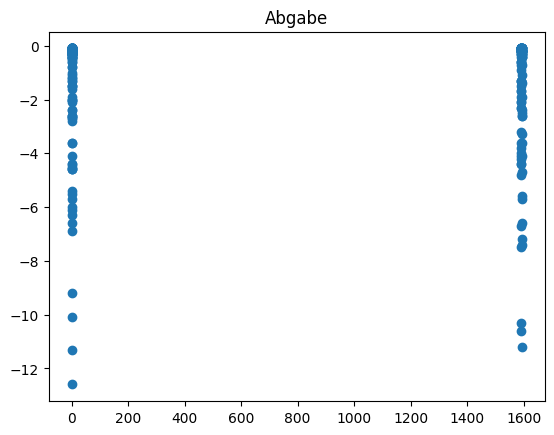

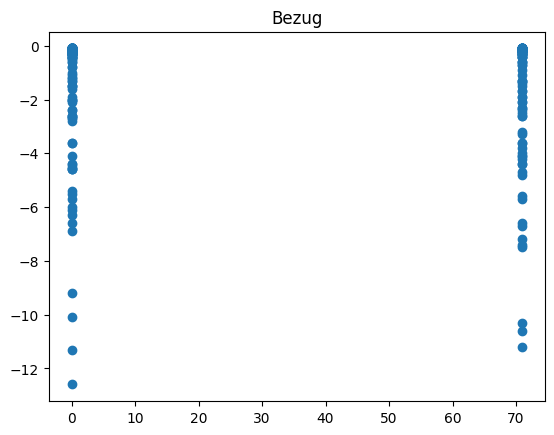

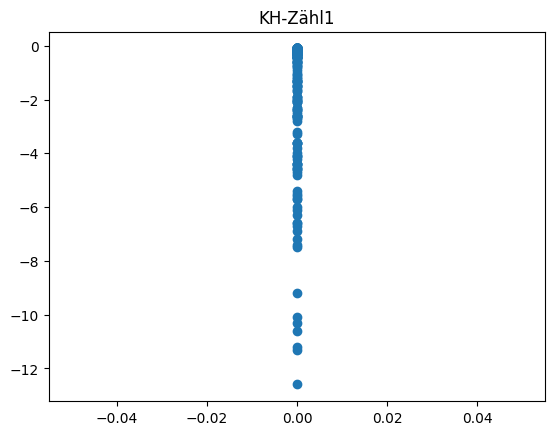

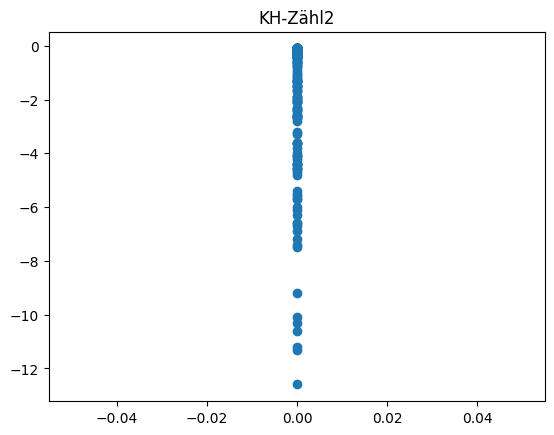

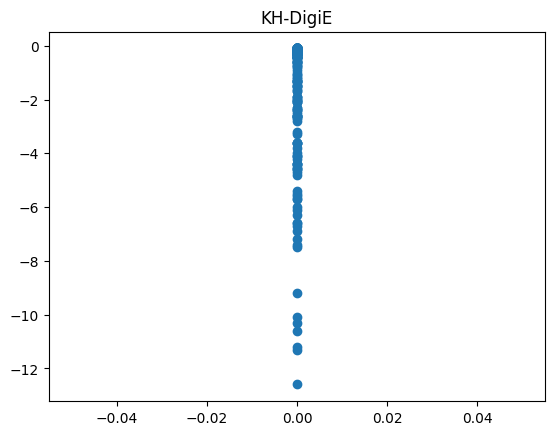

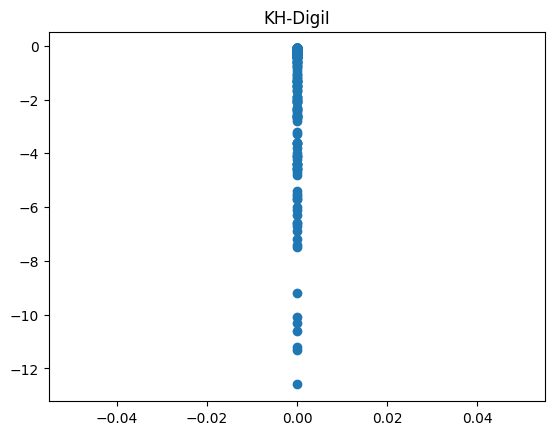

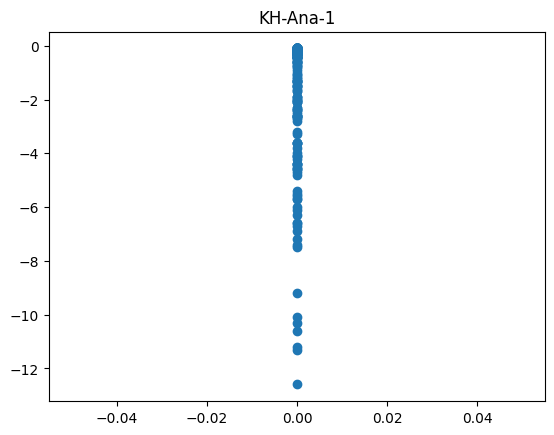

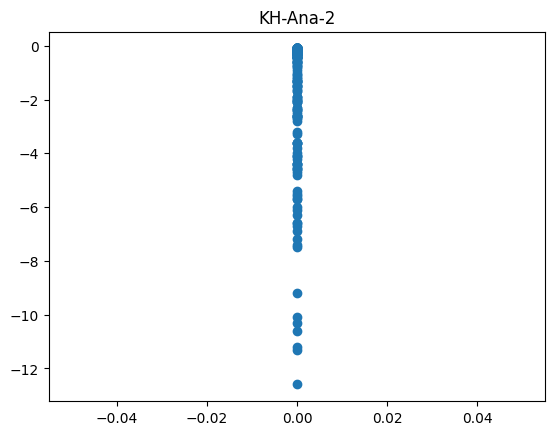

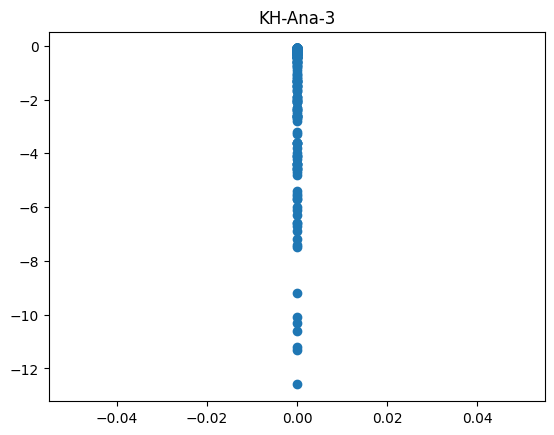

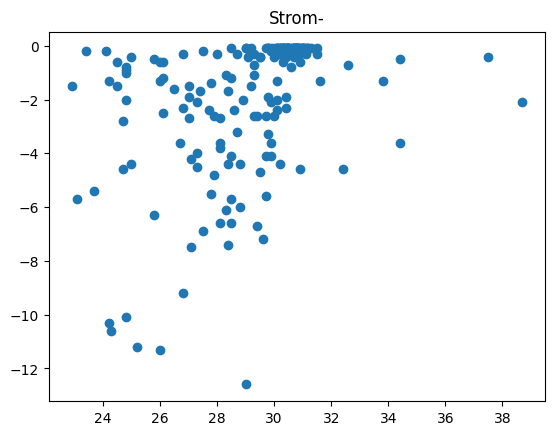

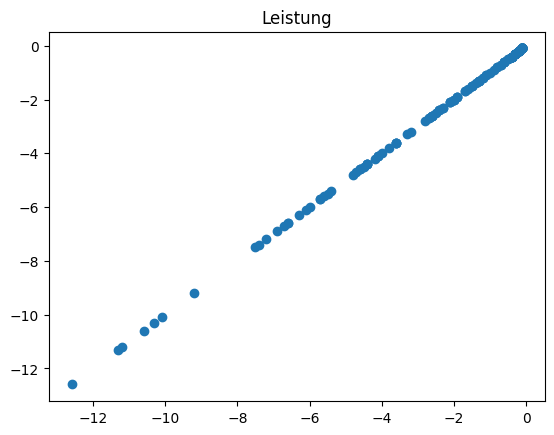

In [1192]:
import matplotlib.pyplot as plt

for col in ["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE', 'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'Strom-', "Leistung"]:
       plt.scatter(data_leistung_negative[col], data_leistung_negative["Leistung"])
       plt.title(col)
       plt.show()
       

In [1179]:
data_less_wind = data_new[data_new["Wind"]<=4]

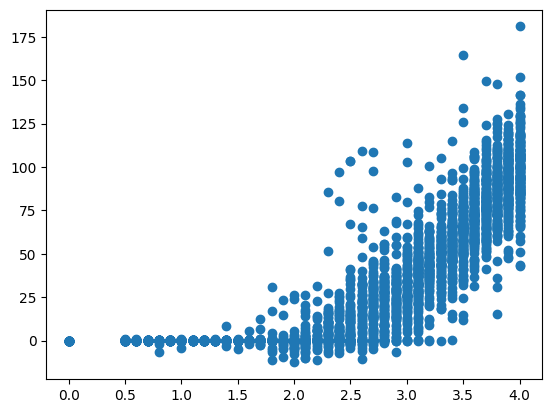

In [1180]:
plt.scatter(data_less_wind["Wind"], data_less_wind["Leistung"])
plt.show()

In [1174]:
data_leistung_negative.weekday.value_counts()

3.0    141
5.0    117
4.0    110
1.0     88
6.0     64
0.0     52
2.0     29
Name: weekday, dtype: int64

In [1175]:
data_leistung_negative.hour.value_counts()

15.0    39
16.0    37
12.0    34
9.0     33
7.0     33
14.0    30
10.0    30
4.0     27
5.0     27
13.0    26
6.0     26
23.0    25
8.0     24
11.0    22
1.0     22
3.0     21
20.0    21
0.0     21
2.0     20
17.0    20
18.0    18
21.0    16
22.0    15
19.0    14
Name: hour, dtype: int64

In [1178]:
data_leistung_negative.day.value_counts()

3     101
16     67
18     59
2      58
17     54
21     40
19     32
1      31
26     24
22     24
14     23
13     22
31     21
15     14
24     11
27      8
20      8
28      2
30      2
Name: day, dtype: int64

In [342]:
from sklearn.linear_model import LinearRegression

In [564]:
data_new

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day
1,01.01.2016. 00:10,5.8,10,268.5,161.4,31533151,5742941,48371,46008,14.8,...,0,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1
2,01.01.2016. 00:20,5.8,10,268.5,161.4,31533151,5742941,48371,46008,14.8,...,0,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1
3,01.01.2016. 00:30,5.8,10,272.1,160.6,31533151,5742983,48371,46008,15.9,...,0,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1
4,01.01.2016. 00:40,6.4,10,320.1,162,31533151,5743039,48371,46008,17.7,...,0,0,0,0....,2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1
5,01.01.2016. 00:50,6.9,14.5,457.4,161.1,31533206,5743049,48371,46008,20,...,0,0,0,0.,2016-01-01 00:50:00,2016-01-01,0.0,4.0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,12.03.2016. 23:10,5.1,10,236.7,55.3,32192288,5838593,49242,46680,13.2,...,0,0,0,0..,2016-12-03 23:10:00,2016-12-03,23.0,5.0,10.0,3
10364,12.03.2016. 23:20,5.4,10,257.1,57.2,32192288,5838633,49242,46680,13.3,...,0,0,0,0....,2016-12-03 23:20:00,2016-12-03,23.0,5.0,20.0,3
10365,12.03.2016. 23:30,5.4,10,248.9,58.9,32192288,5838678,49242,46681,14.7,...,0,0,0,0....,2016-12-03 23:30:00,2016-12-03,23.0,5.0,30.0,3
10366,12.03.2016. 23:40,5.1,10,218.7,57.6,32192288,5838710,49242,46681,14.4,...,0,0,0,0...,2016-12-03 23:40:00,2016-12-03,23.0,5.0,40.0,3


### Model based only on Wind data and Power

In [843]:
data_acc_wind = data_new[["Wind", "Status", "Leistung"]]

In [844]:
data_acc_wind = data_acc_wind.sample(frac = 1)

In [845]:
data_acc_wind

,Wind,Status,Leistung
3314,4.5,0,143.9
9809,6.1,0,316.4
2997,1.4,0,-0.1
8412,2.5,0,-2.6
7846,6.6,0,374.8
...,...,...,...
4531,9.7,0,1136.2
9558,3.7,0,64.1
9008,2.1,0,-5.7
5792,6.0,0,419.7


In [846]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# 
# data_acc_wind = scaler.fit_transform(data_acc_wind)
# 
# data_acc_wind

# for col in data_acc_wind.columns:
#     data_acc_wind[col] = (data_acc_wind[col] - data_acc_wind[col].min()) / (data_acc_wind[col].max()- data_acc_wind[col].min())

data_acc_wind = data_acc_wind.to_numpy()

In [847]:
data_acc_wind

array([[4.5, '0', 143.9],
       [6.1, '0', 316.4],
       [1.4, '0', -0.1],
       ...,
       [2.1, '0', -5.7],
       [6.0, '0', 419.7],
       [7.9, '0', 746.4]], dtype=object)

In [848]:
import numpy as np
train_data = data_acc_wind[:int(data_acc_wind.shape[0]*0.9)]
test_data = data_acc_wind[int(data_acc_wind.shape[0]*0.9):]
print(train_data.shape)
print(test_data.shape)
# np.reshape(data_acc_wind["Wind"].to_numpy(), (-1,1)).shape

(11792, 3)
(1311, 3)


In [849]:
x_train = train_data[:, 0].reshape((-1,1))
print(x_train.shape)
y_train = train_data[:, -1].reshape((-1,1))
print(y_train.shape)

(11792, 1)
(11792, 1)


In [850]:
test_data = test_data[test_data[:, 0].argsort()]

In [851]:
x_test = test_data[:, 0].reshape((-1,1))
print(x_test.shape)
y_test = test_data[:, -1].reshape((-1,1))
print(y_test.shape)

(1311, 1)
(1311, 1)


In [852]:
reg = LinearRegression().fit(x_train, y_train)

In [853]:
y_pred = reg.predict(x_train)
y_pred.shape

(11792, 1)

In [854]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score(y_train, y_pred, multioutput='uniform_average')

0.8967987803943135

In [855]:
mean_squared_error(y_train, y_pred)

22112.586341099366

Text(0.5, 1.0, 'Test data predictions')

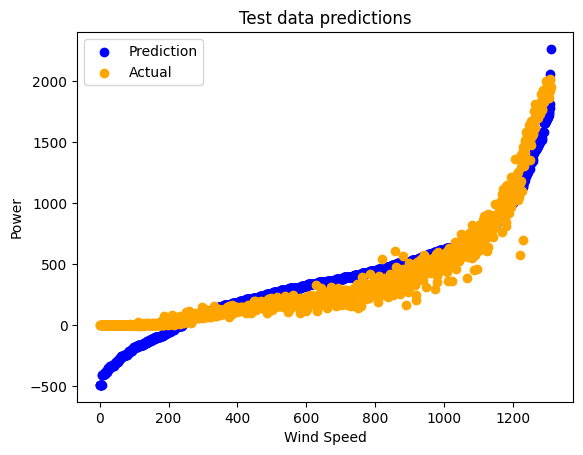

In [856]:
plt.scatter(list(range(x_test.shape[0])), reg.predict(x_test).reshape(-1,).tolist(), color="blue", label="Prediction")
plt.scatter(list(range(x_test.shape[0])), y_test.reshape(-1,).tolist(), color="orange", label = "Actual")
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.legend()
plt.title("Test data predictions")

In [857]:
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred, multioutput='uniform_average')

0.8828928030849499

In [593]:
# plt.scatter(list(range(np.reshape(test_data["Wind"].to_numpy(), (-1,1)).shape[0])), reg.predict(np.reshape(test_data["Wind"].to_numpy(), (-1,1))).reshape(-1,).tolist(), color="blue")
# plt.scatter(list(range(np.reshape(test_data["Wind"].to_numpy(), (-1,1)).shape[0])), np.reshape(test_data["Leistung"].to_numpy(), (-1,1)).reshape(-1,).tolist(), color="orange")

In [859]:
test_prediction = reg.predict(x_test).reshape(-1,).tolist()


value_test_pred = ([e for idx, e in enumerate(test_prediction) if e <0])
idx_test_pred = ([idx for idx, e in enumerate(test_prediction) if e <0])


In [860]:
print(value_test_pred)
print(idx_test_pred)

[-492.804161608964, -492.804161608964, -492.804161608964, -492.804161608964, -492.804161608964, -492.804161608964, -492.804161608964, -414.98583664605894, -414.98583664605894, -414.98583664605894, -414.98583664605894, -399.42217165347796, -399.42217165347796, -399.42217165347796, -399.42217165347796, -399.42217165347796, -383.8585066608969, -383.8585066608969, -383.8585066608969, -383.8585066608969, -383.8585066608969, -383.8585066608969, -368.29484166831594, -368.29484166831594, -352.7311766757349, -352.7311766757349, -352.7311766757349, -352.7311766757349, -352.7311766757349, -352.7311766757349, -337.16751168315386, -337.16751168315386, -337.16751168315386, -337.16751168315386, -337.16751168315386, -337.16751168315386, -337.16751168315386, -337.16751168315386, -337.16751168315386, -337.16751168315386, -337.16751168315386, -337.16751168315386, -321.6038466905728, -321.6038466905728, -321.6038466905728, -321.6038466905728, -306.0401816979919, -306.0401816979919, -306.0401816979919, -30

In [861]:
len(idx_test_pred)

239

In [866]:
np.unique(test_data[idx_test_pred, 1], return_counts=True)

(array(['0', '94', '9999'], dtype=object), array([230,   1,   8], dtype=int64))

In [598]:
[y_test.tolist()[idx] for idx in idx_test_pred]

[[0.0059327620303230065],
 [0.0059327620303230065],
 [0.0059327620303230065],
 [0.0059327620303230065],
 [0.0060269328562011495],
 [0.0061211036820792925],
 [0.005979847443262078],
 [0.0059327620303230065],
 [0.005885676617383935],
 [0.0059327620303230065],
 [0.005979847443262078],
 [0.0060269328562011495],
 [0.0061211036820792925],
 [0.0059327620303230065],
 [0.0059327620303230065],
 [0.0059327620303230065],
 [0.0061211036820792925],
 [0.006074018269140221],
 [0.0059327620303230065],
 [0.005979847443262078],
 [0.0059327620303230065],
 [0.0059327620303230065],
 [0.0060269328562011495],
 [0.006074018269140221],
 [0.006168189095018364],
 [0.005038139184480648],
 [0.005979847443262078],
 [0.0059327620303230065],
 [0.006074018269140221],
 [0.005791505791505792],
 [0.0060269328562011495],
 [0.005979847443262078],
 [0.0059327620303230065],
 [0.005885676617383935],
 [0.005979847443262078],
 [0.006074018269140221],
 [0.0061211036820792925],
 [0.0059327620303230065],
 [0.0059327620303230065],
 

In [599]:
[x_test.tolist()[idx] for idx in idx_test_pred]

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.02824858757062147],
 [0.02824858757062147],
 [0.02824858757062147],
 [0.02824858757062147],
 [0.02824858757062147],
 [0.03389830508474576],
 [0.03389830508474576],
 [0.03389830508474576],
 [0.03389830508474576],
 [0.03954802259887005],
 [0.03954802259887005],
 [0.03954802259887005],
 [0.03954802259887005],
 [0.03954802259887005],
 [0.03954802259887005],
 [0.03954802259887005],
 [0.04519774011299435],
 [0.04519774011299435],
 [0.04519774011299435],
 [0.04519774011299435],
 [0.04519774011299435],
 [0.04519774011299435],
 [0.05084745762711865],
 [0.05084745762711865],
 [0.05084745762711865],
 [0.05084745762711865],
 [0.05649717514124294],
 [0.05649717514124294],
 [0.05649717514124294],
 [0.05649717514124294],
 [0.05649717514124294],
 [0.05649717514124294],
 [0.05649717514124294],
 [0.05649717514124294],
 [0.05649717514124294],
 [0.062146892655367235],
 [0.062146892655367235],
 [0.062146892655367235],
 [0.062146892655367235],
 [0.062146892655367235],
 [0

In [ ]:
plt.figure(figsize=(40,5))
plt.plot(data_new["time"], data_new["Leistung"])
plt.show()

### Model based using other sensor data

In [ ]:
# reg.score(np.reshape(train_data["Wind"].to_numpy(), (-1,1)), np.reshape(train_data["Leistung"].to_numpy(), (-1,1)))
# reg.score(np.reshape(test_data["Wind"].to_numpy(), (-1,1)), np.reshape(test_data["Leistung"].to_numpy(), (-1,1)))

In [359]:
# from sklearn.svm import SVR
# regressor = SVR(kernel = 'rbf')
# regressor.fit(np.reshape(data_new["Wind"].to_numpy(), (-1,1)), np.reshape(data_new["Leistung"].to_numpy(), (-1,1)))
# regressor.score(np.reshape(data_new["Wind"].to_numpy(), (-1,1)), np.reshape(data_new["Leistung"].to_numpy(), (-1,1)))

C:\Users\ridgar1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [867]:
data_new.columns

Index(['Dat/Zeit', 'Wind', 'Rotor', 'Leistung', 'Azimut', 'Prod. 1', 'Prod. 2',
       'BtrStd 1', 'BtrStd 2', 'Gen1-', 'Lager', 'Außen', 'GetrT', 'Status',
       'Spann', 'Spann.1', 'Spann.2', 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'KH-Ana-4', 'time',
       'date', 'hour', 'weekday', 'min', 'day'],
      dtype='object')

In [1042]:
data_new["Abgabe"].value_counts()

0       6034
1591    3285
1595    2042
1590    1740
1593       2
Name: Abgabe, dtype: int64

In [1117]:
data_selected = data_new[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'Strom-',  "Leistung"]]
#["Wind","Rotor", "Gen1-", "Lager", "Spann", "Spann.1", "Spann.2", "GetrT", 'Strom-', 'Strom-.1', 'Strom-.2', "Leistung"]

In [1118]:
data_selected.dtypes

Wind        float64
Rotor        object
Azimut       object
Prod. 1      object
Prod. 2      object
BtrStd 1     object
BtrStd 2     object
Gen1-        object
Lager        object
Außen        object
GetrT        object
Spann        object
Spann.1      object
Spann.2      object
Abgabe       object
Bezug        object
KH-Zähl1     object
KH-Zähl2     object
KH-DigiE     object
KH-DigiI     object
KH-Ana-1     object
KH-Ana-2     object
KH-Ana-3     object
Strom-       object
Leistung    float64
dtype: object

In [1119]:
data_selected[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'Strom-', "Leistung"]] = data_selected[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'Strom-', "Leistung"]].apply(pd.to_numeric)

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_4716\4047693469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',


In [1120]:
data_selected = data_selected.sample(frac = 1)

In [1121]:
from sklearn.preprocessing import MinMaxScaler


# for col in data_selected.columns:
#     data_selected[col] = (data_selected[col] - data_selected[col].min()) / (data_selected[col].max()- data_selected[col].min())

data_selected = data_selected.to_numpy()

In [1122]:
data_selected

array([[  5.3,  11.6, 315.7, ...,   0. , 135.7, 133.8],
       [  4.2,  10. , 198.9, ...,   0. , 111.4, 130.3],
       [  0.8,   0. , 265.6, ...,   0. ,  30.1,   0.4],
       ...,
       [  3.6,  10. , 205.4, ...,   0. ,  72.9,  85.4],
       [  5.7,  16. ,  59.1, ...,   0. , 242. , 225.6],
       [  3.6,  10. , 247.1, ...,   0. ,  71.4,  82.7]])

In [1123]:
train_data = data_selected[:int(data_selected.shape[0]*0.9)]
test_data = data_selected[int(data_selected.shape[0]*0.9):]
print(train_data.shape)
print(test_data.shape)

(11792, 25)
(1311, 25)


In [1124]:
train_data

array([[5.300e+00, 1.160e+01, 3.157e+02, ..., 0.000e+00, 1.357e+02,
        1.338e+02],
       [4.200e+00, 1.000e+01, 1.989e+02, ..., 0.000e+00, 1.114e+02,
        1.303e+02],
       [8.000e-01, 0.000e+00, 2.656e+02, ..., 0.000e+00, 3.010e+01,
        4.000e-01],
       ...,
       [7.500e+00, 1.600e+01, 1.590e+02, ..., 0.000e+00, 5.094e+02,
        5.771e+02],
       [4.200e+00, 1.000e+01, 3.305e+02, ..., 0.000e+00, 9.410e+01,
        1.127e+02],
       [8.300e+00, 1.600e+01, 2.579e+02, ..., 0.000e+00, 6.684e+02,
        7.945e+02]])

In [1125]:
x_train = train_data[:, :-1]
print(x_train.shape)
y_train = train_data[:, -1].reshape((-1,1))
print(y_train.shape)

(11792, 24)
(11792, 1)


In [1126]:
x_train

array([[  5.3,  11.6, 315.7, ...,   0. ,   0. , 135.7],
       [  4.2,  10. , 198.9, ...,   0. ,   0. , 111.4],
       [  0.8,   0. , 265.6, ...,   0. ,   0. ,  30.1],
       ...,
       [  7.5,  16. , 159. , ...,   0. ,   0. , 509.4],
       [  4.2,  10. , 330.5, ...,   0. ,   0. ,  94.1],
       [  8.3,  16. , 257.9, ...,   0. ,   0. , 668.4]])

In [1127]:
test_data = test_data[test_data[:, 0].argsort()]

In [1128]:
x_test = test_data[:, :-1]
print(x_test.shape)
y_test = test_data[:, -1].reshape((-1,1))
print(y_test.shape)

(1311, 24)
(1311, 1)


In [1129]:
reg = LinearRegression().fit(x_train, y_train)

In [1130]:
y_pred = reg.predict(x_train)
y_pred.shape

(11792, 1)

In [1131]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score(y_train, y_pred, multioutput='uniform_average')

0.9980064269451748

In [1132]:
print(min(reg.predict(x_test).reshape(-1,).tolist()))

-20.029173012161777


Text(0.5, 1.0, 'Test data predictions')

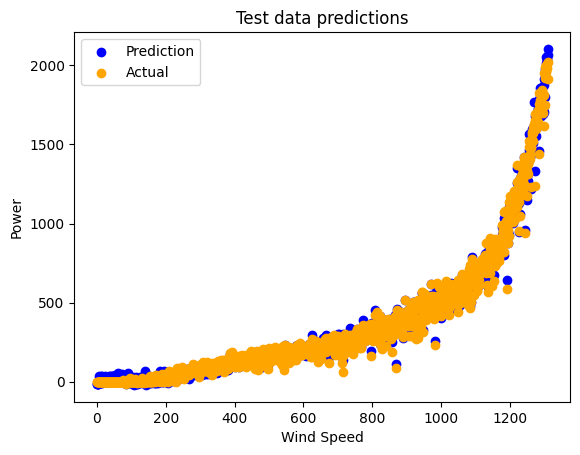

In [1133]:
plt.scatter(list(range(x_test.shape[0])), reg.predict(x_test).reshape(-1,).tolist(), color="blue", label="Prediction")
plt.scatter(list(range(x_test.shape[0])), y_test.reshape(-1,).tolist(), color="orange", label = "Actual")
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.legend()
plt.title("Test data predictions")

In [1134]:
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred, multioutput='uniform_average')

0.9971867717700272

In [1135]:
mean_squared_error(y_test, y_pred, multioutput='uniform_average')

476.19879671516264